# Loan predictions - Notebook 2: Preprocessing

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/loan_pred.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

In [2]:
#first split X and y
X = df.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y = df['Loan_Status']

In [3]:
#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [4]:
from sklearn.preprocessing import FunctionTransformer

# Using own function in Pipeline
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [36]:
# we will start two separate pipelines for each type of features
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

In [5]:
X_train.isnull().sum()

Gender               12
Married               1
Dependents           11
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     12
Credit_History       40
Property_Area         0
dtype: int64

In [6]:
#categorical features
cat_feats = X_train.dtypes[X.dtypes == 'object'].index.tolist()
#numeric features
num_feats = X_train.dtypes[~X.dtypes.index.isin(cat_feats)].index.tolist()

Categorical Features: of the object types Gender, Married, Dependents, and Self_Employed require imputing. Let's replace all with the mode

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean = imp_mean.fit(X_train[cat_feats])
X_train[cat_feats] = imp_mean.transform(X_train[cat_feats])
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban


In [9]:
X_train[cat_feats].isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

Numeric Features: 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' require imputing. 

                        For the train data, let's see if it makes a different if we replace Loan Term with 0 where the Loan_Status is 'N'. 
                        This will obviously not be done for any test. The rest can be replaced by the mode.

In [10]:
num_feats

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
# assign 0 to Loan_Amount_Term that have a Loan_Status of 'N'
X_train.loc[(df['Loan_Amount_Term'].isna()) & (df['Loan_Status'] == 'N'), 'Loan_Amount_Term'] = 0

In [12]:
#check that the null sum went down from 12
X_train['Loan_Amount_Term'].isna().sum()

8

In [13]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(X_train[num_feats])
X_train[num_feats] = imp_mean.transform(X_train[num_feats])
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,Male,Yes,0,Graduate,No,6000.0,2250.0,265.0,360.0,0.844789,Semiurban
90,Male,Yes,0,Graduate,No,2958.0,2900.0,131.0,360.0,1.000000,Semiurban
227,Male,Yes,2,Graduate,No,6250.0,1695.0,210.0,360.0,1.000000,Semiurban
482,Male,Yes,0,Graduate,No,2083.0,3150.0,128.0,360.0,1.000000,Semiurban
464,Male,No,0,Graduate,No,4166.0,0.0,98.0,360.0,0.000000,Semiurban


In [14]:
X_train[num_feats].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### Extreme values

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

In [19]:
def total_income_col_creator(df):
    """
    add a column for the total income
    PARAMS:
    dataframe
    """
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

                            I tried to add my custom function to my pipeline, but was unsucessful.

In [21]:
FunctionTransformer(total_income_col_creator(X_train))

FunctionTransformer()

In [22]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
83,Male,Yes,0,Graduate,No,6000.0,2250.0,265.0,360.0,0.844789,Semiurban,8250.0
90,Male,Yes,0,Graduate,No,2958.0,2900.0,131.0,360.0,1.000000,Semiurban,5858.0


In [24]:
def log_transformer(df):
    """
    perform a log transform on the LoanAmount and Total Income columns. returns a df with the log transformed features and removes the originals.
    """
    df["LoanAmount_log"] = df['LoanAmount'].map(lambda i: np.log(i))
    df["Total_Income_log"] = df['Total_Income'].map(lambda i: np.log(i))
    df.drop(['LoanAmount', 'Total_Income'], axis = 1, inplace = True)

                            This function works, but let's do the manual calculation to show the functions side by side before dropping the original features

In [29]:
# FunctionTransformer(log_transformer(X_train))

FunctionTransformer(func=     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
83     Male     Yes          0      Graduate            No           6000.0   
90     Male     Yes          0      Graduate            No           2958.0   
227    Male     Yes          2      Graduate            No           6250.0   
482    Male     Yes          0      Graduate            No           2083.0   
464    Male      No          0      Graduate            No           4166.0   
..      ...     ...        ...           ...           ...              ...   
71     Male     Yes          2  Not Graduate           Yes           1875.0   
106    Male     Yes          2      Graduate            No          11417.0   
270  Female      No          0      Graduate            No           3237.0   
435  Female     Yes          0      Graduate            No          100...
71              1875.0             360.0        1.000000     Semiurban   
106             1126.0             3

In [25]:
#manual
X_train["LoanAmount_log"] = X_train['LoanAmount'].map(lambda i: np.log(i))
X_train["Total_Income_log"] = X_train['Total_Income'].map(lambda i: np.log(i))

In [26]:
print(f'The Total Income Feature Skew: {X_train["Total_Income"].skew()}')
print(f'The Log Transformed Total Income Feature Skew: {X_train["Total_Income_log"].skew()}')
print(' ')
print(f'The Loan Amount Feature Skew: {X_train["LoanAmount"].skew()}')
print(f'The Log Transformed Loan Amount Feature Skew: {X_train["LoanAmount_log"].skew()}')

The Total Income Feature Skew: 5.461904412667907
The Log Transformed Total Income Feature Skew: 0.9692119321554888
 
The Loan Amount Feature Skew: 2.654625027092978
The Log Transformed Loan Amount Feature Skew: -0.05052979395881136


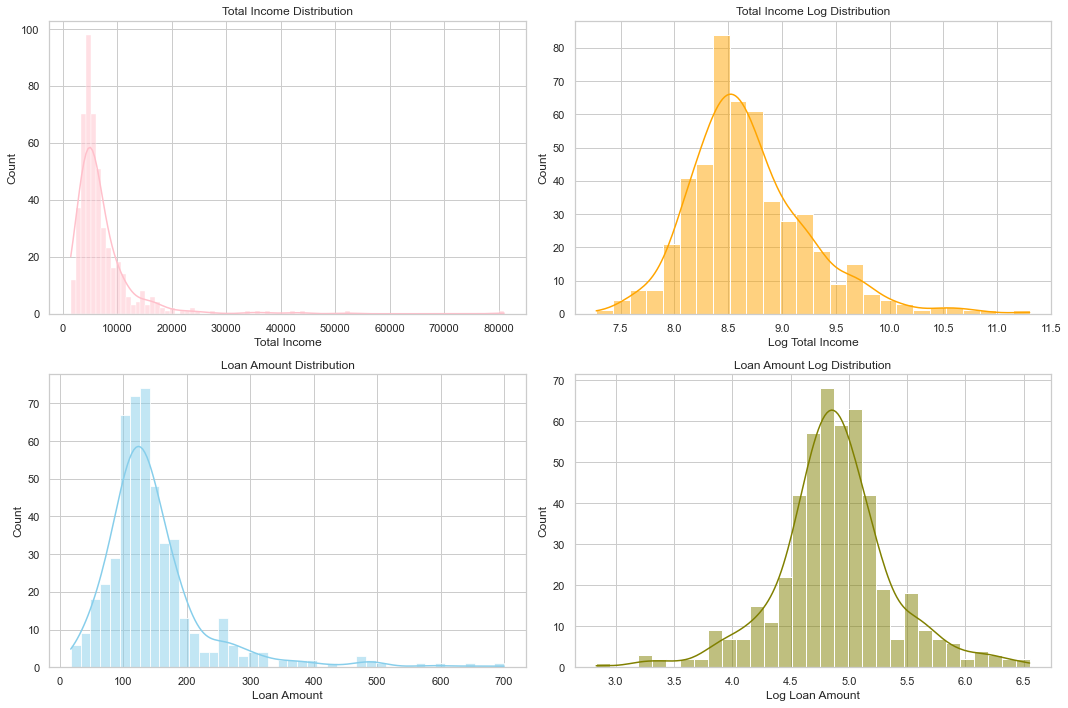

In [27]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (15,10))

sns.histplot(data=X_train, x='Total_Income', kde=True, color="pink", ax = axs[0,0]).set(title='Total Income Distribution', xlabel='Total Income')
sns.histplot(data=X_train, x='Total_Income_log', kde=True, color="orange", ax = axs[0,1]).set(title='Total Income Log Distribution', xlabel='Log Total Income')

sns.histplot(data=X_train, x="LoanAmount", kde=True, color="skyblue", ax = axs[1,0]).set(title='Loan Amount Distribution', xlabel='Loan Amount')
sns.histplot(data=X_train, x="LoanAmount_log", kde=True, color="olive", ax = axs[1,1]).set(title='Loan Amount Log Distribution', xlabel='Log Loan Amount')

fig.tight_layout()

                            Looks like the transformation worked better for the Loan Amount feature than the Total Income

In [28]:
#now we can drop the original features
X_train.drop(['LoanAmount', 'Total_Income'], axis = 1, inplace = True)

### OneHot Encode Categorical Variables

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
ohe = OneHotEncoder(drop='first')

X_object = X_train.select_dtypes('object')
X_train_ohe = ohe.fit_transform(X_object)

In [31]:
X_train_ohe

<491x9 sparse matrix of type '<class 'numpy.float64'>'
	with 1434 stored elements in Compressed Sparse Row format>

## Preprocessing Conclusions

                Since I wasn't able to successfully add my custom functions to my pipeline, I won't be able to run the model with X_train in it's current format. 
                It's features won't match the X_test features

In [37]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'LoanAmount_log',
       'Total_Income_log'],
      dtype='object')

In [38]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')